In [1]:
from audiofile_read import *
%pylab inline

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

# numerical processing and scientific libraries
import numpy as np

# plotting
import matplotlib.pyplot as plt


# Rhythm Pattern Audio Extraction Library
from rp_extract import rp_extract
from rp_plot import *   # can be skipped if you don't want to do any plots


# misc
from urllib.request import urlopen
import urllib.request
import gzip
from io import StringIO

Populating the interactive namespace from numpy and matplotlib


In [47]:
# provide/adjust the path to your wav or mp3 file

audiofile_match1 = "../../Matches_Beat/9/1-accompaniment.wav"
audiofile_match2 = "../../Matches_Beat/9/accompaniment.wav"

audiofile_nichtmatch1 = "../../Matches_Beat/4/1-accompaniment.wav"
audiofile_nichtmatch2 = "../../Matches_Beat/7/accompaniment.wav"

samplerate_match1, samplewidth_match1, wavedata_match1 = audiofile_read(audiofile_match1)
samplerate_match2, samplewidth_match2, wavedata_match2 = audiofile_read(audiofile_match2)

samplerate_nichtmatch1, samplewidth_nichtmatch1, wavedata_nichtmatch1 = audiofile_read(audiofile_nichtmatch1)
samplerate_nichtmatch2, samplewidth_nichtmatch2, wavedata_nichtmatch2 = audiofile_read(audiofile_nichtmatch2)

In [48]:
features_match2 = rp_extract(wavedata_match2,                            # the two-channel wave-data of the audio-file
                                samplerate_match2,                          # the samplerate of the audio-file
                                extract_rp          = True,          # <== extract this feature!
                                transform_db        = True,          # apply psycho-accoustic transformation
                                transform_phon      = True,          # apply psycho-accoustic transformation
                                transform_sone      = True,          # apply psycho-accoustic transformation
                                fluctuation_strength_weighting=True, # apply psycho-accoustic transformation
                                skip_leadin_fadeout = 1,             # skip lead-in/fade-out. value = number of segments skipped
                                step_width          = 1)             #

features_match1 = rp_extract(wavedata_match1,                            # the two-channel wave-data of the audio-file
                                samplerate_match1,                          # the samplerate of the audio-file
                                extract_rp          = True,          # <== extract this feature!
                                transform_db        = True,          # apply psycho-accoustic transformation
                                transform_phon      = True,          # apply psycho-accoustic transformation
                                transform_sone      = True,          # apply psycho-accoustic transformation
                                fluctuation_strength_weighting=True, # apply psycho-accoustic transformation
                                skip_leadin_fadeout = 1,             # skip lead-in/fade-out. value = number of segments skipped
                                step_width          = 1)             #

features_nichtmatch1 = rp_extract(wavedata_nichtmatch1,                            # the two-channel wave-data of the audio-file
                                samplerate_nichtmatch1,                          # the samplerate of the audio-file
                                extract_rp          = True,          # <== extract this feature!
                                transform_db        = True,          # apply psycho-accoustic transformation
                                transform_phon      = True,          # apply psycho-accoustic transformation
                                transform_sone      = True,          # apply psycho-accoustic transformation
                                fluctuation_strength_weighting=True, # apply psycho-accoustic transformation
                                skip_leadin_fadeout = 1,             # skip lead-in/fade-out. value = number of segments skipped
                                step_width          = 1)             #

features_nichtmatch2 = rp_extract(wavedata_nichtmatch2,                            # the two-channel wave-data of the audio-file
                                samplerate_nichtmatch2,                          # the samplerate of the audio-file
                                extract_rp          = True,          # <== extract this feature!
                                transform_db        = True,          # apply psycho-accoustic transformation
                                transform_phon      = True,          # apply psycho-accoustic transformation
                                transform_sone      = True,          # apply psycho-accoustic transformation
                                fluctuation_strength_weighting=True, # apply psycho-accoustic transformation
                                skip_leadin_fadeout = 1,             # skip lead-in/fade-out. value = number of segments skipped
                                step_width          = 1)             #

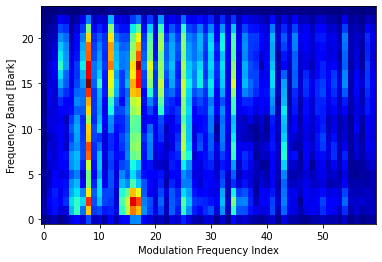

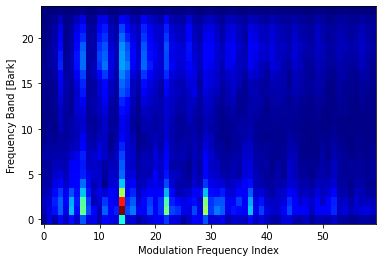

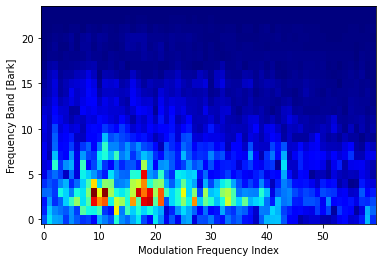

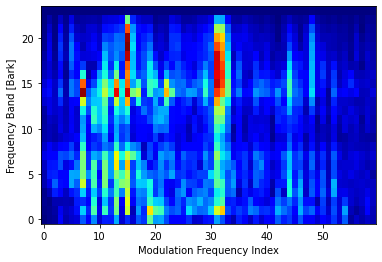

In [49]:
plotrp(features_match1['rp'])
plotrp(features_match2['rp'])
plotrp(features_nichtmatch1['rp'])
plotrp(features_nichtmatch2['rp'])

In [83]:
# use combine the channels by calculating their geometric mean
wavedata_mono = np.mean(wavedata, axis=1)

# use combine the channels by calculating their geometric mean
wavedata_mono2 = np.mean(wavedata2, axis=1)

In [18]:
features_match1 = rp_extract(wavedata_match1,                            # the two-channel wave-data of the audio-file
                                samplerate_match1,                          # the samplerate of the audio-file
                                extract_ssd         = True,          # <== extract this feature!
                                transform_db        = True,          # apply psycho-accoustic transformation
                                transform_phon      = True,          # apply psycho-accoustic transformation
                                transform_sone      = True,          # apply psycho-accoustic transformation
                                fluctuation_strength_weighting=True, # apply psycho-accoustic transformation
                                skip_leadin_fadeout = 1,             # skip lead-in/fade-out. value = number of segments skipped
                                step_width          = 1)             #

features_match2 = rp_extract(wavedata_match2,                            # the two-channel wave-data of the audio-file
                                samplerate_match2,                          # the samplerate of the audio-file
                                extract_ssd         = True,          # <== extract this feature!
                                transform_db        = True,          # apply psycho-accoustic transformation
                                transform_phon      = True,          # apply psycho-accoustic transformation
                                transform_sone      = True,          # apply psycho-accoustic transformation
                                fluctuation_strength_weighting=True, # apply psycho-accoustic transformation
                                skip_leadin_fadeout = 1,             # skip lead-in/fade-out. value = number of segments skipped
                                step_width          = 1)  

features_nichtmatch1 = rp_extract(wavedata_nichtmatch1,                            # the two-channel wave-data of the audio-file
                                samplerate_nichtmatch1,                          # the samplerate of the audio-file
                                extract_ssd         = True,          # <== extract this feature!
                                transform_db        = True,          # apply psycho-accoustic transformation
                                transform_phon      = True,          # apply psycho-accoustic transformation
                                transform_sone      = True,          # apply psycho-accoustic transformation
                                fluctuation_strength_weighting=True, # apply psycho-accoustic transformation
                                skip_leadin_fadeout = 1,             # skip lead-in/fade-out. value = number of segments skipped
                                step_width          = 1)             #

features_nichtmatch2 = rp_extract(wavedata_nichtmatch2,                            # the two-channel wave-data of the audio-file
                                samplerate_nichtmatch2,                          # the samplerate of the audio-file
                                extract_ssd         = True,          # <== extract this feature!
                                transform_db        = True,          # apply psycho-accoustic transformation
                                transform_phon      = True,          # apply psycho-accoustic transformation
                                transform_sone      = True,          # apply psycho-accoustic transformation
                                fluctuation_strength_weighting=True, # apply psycho-accoustic transformation
                                skip_leadin_fadeout = 1,             # skip lead-in/fade-out. value = number of segments skipped
                                step_width          = 1)  

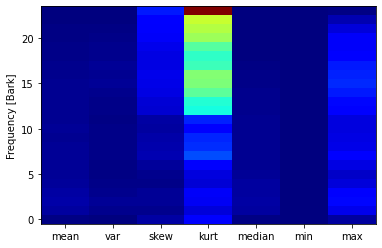

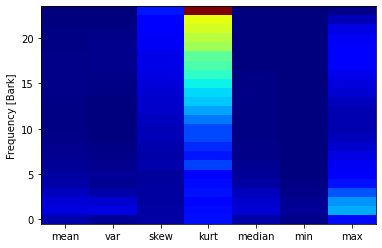

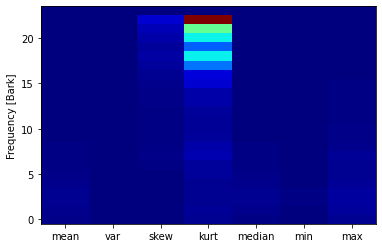

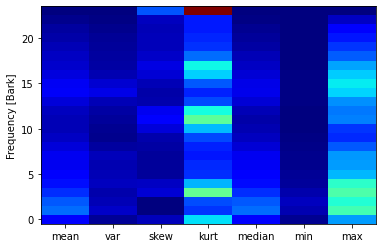

In [19]:
plotssd(features_match1['ssd'])
plotssd(features_match2['ssd'])
plotssd(features_nichtmatch1['ssd'])
plotssd(features_nichtmatch2['ssd'])